In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Investigate the changes in temperature worldwide
1. Compare Singapore's energy consumption vs the rest of the world
2. Investigate relationship between CO2 emissions vs Land Average Temperature vs Types of Energy split

### Singapore Average Temperature time series

In [2]:
df1 = pd.read_csv('air-temp-monthly-mean.csv',index_col = [0])
df1

,mean_temp
month,
1982-01,25.9
1982-02,27.1
1982-03,27.2
1982-04,27.0
1982-05,28.0
...,...
2020-03,28.6
2020-04,28.9
2020-05,28.9


<AxesSubplot:xlabel='month'>

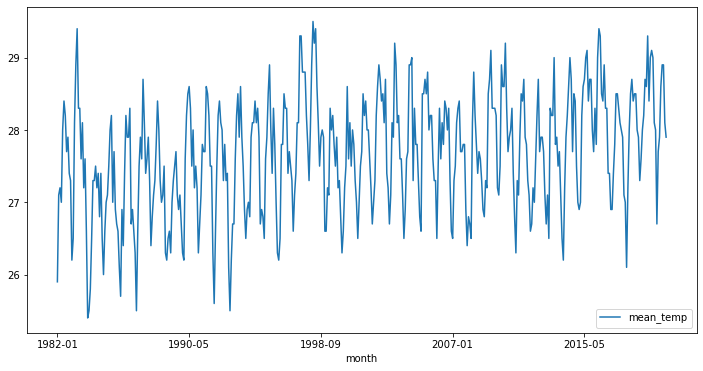

In [3]:
df1.plot(figsize = (12,6)) #Chart needs smoothing

### After smoothing we can see that temperature over time has been on an uptrend.

<AxesSubplot:title={'center':'30-day Smoothed Average Temperature in Singapore (1982-2020)'}, xlabel='month'>

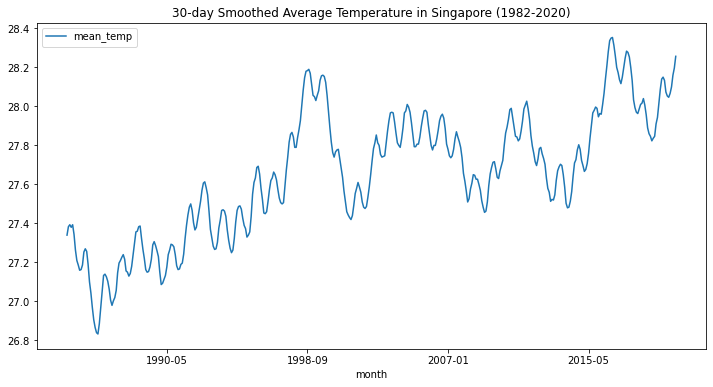

In [4]:
plot = df1.rolling(30).mean().plot(figsize = (12,6),title = '30-day Smoothed Average Temperature in Singapore (1982-2020)')
plot

# Next we take a look at energy consumption/ electricity usage patterns

In [6]:
df = pd.read_csv('per-capita-energy-use.csv')
country_dict = {}
for data in df.groupby('Entity'):
    new_data= data[1].drop('Code',axis = 1)
    new_data.index = new_data.Year
    new_data.drop('Year',axis = 1, inplace = True)
    country_dict[data[0]] = new_data

In [7]:
df[(df['Entity']=='Singapore')&((df['Year']==1980)|(df.Year==1990)|(df.Year==2000)|(df.Year == 2019))]

,Entity,Code,Year,Energy consumption per capita (kWh)
7141,Singapore,SGP,1980,46256.735
7151,Singapore,SGP,1990,90630.133
7161,Singapore,SGP,2000,109931.312
7180,Singapore,SGP,2019,169886.083


In [8]:
tgt_ctrs = ['Singapore','North America','Europe','China','India','France','Japan']
plot_df = country_dict['Singapore']
plot_df.drop('Entity',axis = 1,inplace = True)
plot_df.columns = ['Singapore']
for ctry in tgt_ctrs[1:]:
    plot_df[ctry] = country_dict[ctry]['Energy consumption per capita (kWh)']

In [9]:
### Note that Singapore has the highest energy consumption per capita vs other major countries

In [10]:
plot_df['Singapore'].std()

48015.29112561376

<AxesSubplot:title={'center':'Energy Consumption Per Capita (kWh)'}, xlabel='Year'>

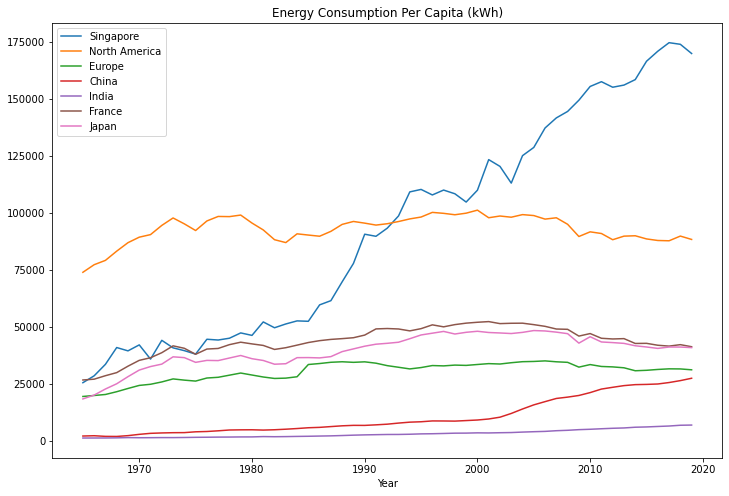

In [11]:
plot_df.plot(figsize = (12,8),title = 'Energy Consumption Per Capita (kWh)')
# Singapore has the highest energy consumption per capita

In [12]:
### Compare energy consumption per capita with the global average temperature

In [13]:
#Get the global land temperature dataset
df = pd.read_csv('GlobalTemperatures.csv') #Read global temperature csv file
df = df.iloc[::12]
df = df[['dt','LandAverageTemperature']] #Get just the date and the land average temp
df.LandAverageTemperature = df.LandAverageTemperature.astype(float) #Change to floating type
year = list(map(lambda x: int(x[:4]),df.dt))
df.dt = year
df.columns = ['Year','LandAverageTemperature']
temperature = df[df['Year']>=1965]
temperature.head(5)

,Year,LandAverageTemperature
2580,1965,2.862
2592,1966,2.490
2604,1967,2.710
2616,1968,2.353
2628,1969,1.966


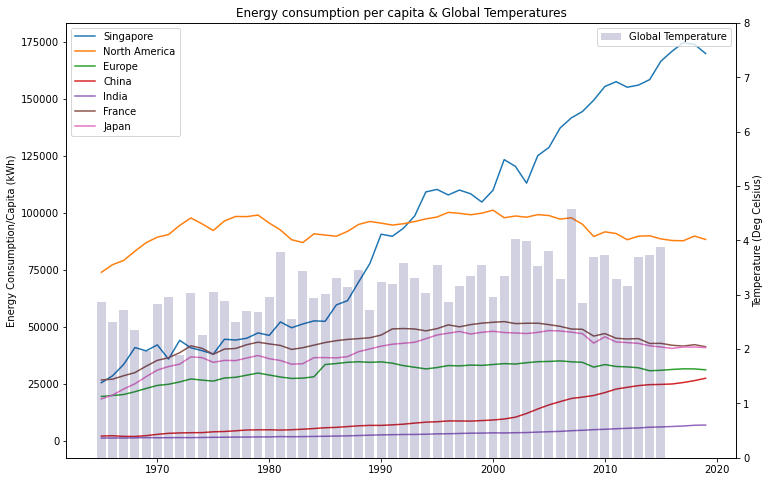

<Figure size 432x288 with 0 Axes>

In [14]:

#Plot bars
plt.figure(figsize = (12,8))
for labels in plot_df.columns:
    x = plot_df.index
    y = plot_df[labels]
    plt.plot(x,y,label = labels)
plt.ylabel('Energy Consumption/Capita (kWh)')
plt.title('Energy consumption per capita & Global Temperatures')
plt.legend()
ax = plt.twinx()
ax.bar(temperature.Year,temperature.LandAverageTemperature, color = 'midnightblue', label = 'Global Temperature',alpha = 0.2)
ax.set_ylim(0.0,8.0)
ax.set_ylabel('Temperature (Deg Celsius)')
ax.legend()
plt.show()
plt.savefig('Energy_consumption_per_capita_global_temp.png')

### There is a clear r/s between world temperatures and energy consumptopn
# Now that we have identified that Singapore is the highest energy consumption per capita, we want to zoom into singapore
1. Look at the Household and Businesses Energy consumption

In [15]:
df = pd.read_excel('Sg_energy_mix_Public_2021_tidy.xlsx', sheet_name = 'T3.2')
df = df.groupby(['year','sector']).sum()
df

consumption_gwh
year sector                                        
2005 Commerce and Services-related          26151.1
     Households                              6092.5
     Industrial-related                     29018.1
     Others                                   612.1
     Overall                                35489.3
...                                             ...
2021 Households                              3969.9
     Industrial-related                     21698.8
     Others                                   114.3
     Overall                                25948.1
     Transport-Related                       1378.8

[102 rows x 1 columns]

In [16]:
plot_df = {}
for sector in df.groupby('sector'):
    data = sector[1][:-1]
    data = data[['consumption_gwh']]
    data.index = np.arange(2005,2021)
    plot_df[sector[0]] = data


In [17]:
df = pd.DataFrame(plot_df['Commerce and Services-related'])
for i in plot_df:
    if i in ['Households', 'Industrial-related','Transport-Related']:
        df = pd.concat([df,plot_df[i]],axis = 1)
df.columns = ['Commerce and Services-related', 'Households', 'Industrial-related', 'Transport-Related']

df

,Commerce and Services-related,Households,Industrial-related,Transport-Related
2005,26151.1,6092.5,29018.1,1200.0
2006,27571.4,6109.1,30230.8,1245.4
2007,29041.2,6163.7,31638.0,1300.2
2008,30009.3,6094.0,32061.9,1399.8
2009,29600.1,6430.8,31140.6,1607.8
2010,30939.5,6636.0,35325.1,2098.7
2011,31752.5,6482.7,36155.0,2224.2
2012,32732.2,6629.5,37145.0,2328.6
2013,33437.2,6754.9,37685.6,2369.1
2014,34093.2,6924.4,39506.5,2441.0


Text(0.5, 1.0, 'Electricity Consumption by Sector in Singapore (gWh)')

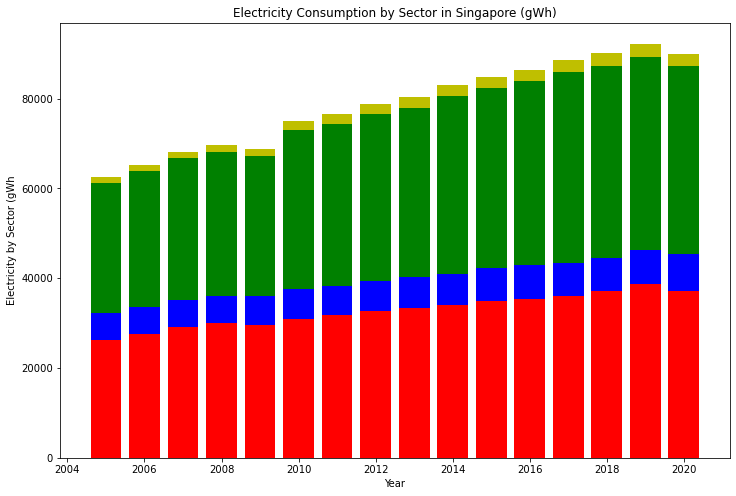

In [18]:
x = df.index
y0 = df[df.columns[0]].values
y1 = df[df.columns[1]].values
y2 = df[df.columns[2]].values
y3 = df[df.columns[3]].values
plt.figure(figsize = (12,8))
plt.bar(x,y0, color = 'r')
plt.bar(x,y1, bottom =y0,color = 'b')
plt.bar(x,y2, bottom =y1+y0,color = 'g')
plt.bar(x,y3, bottom =y2+y1+y0,color = 'y')
plt.xlabel('Year')
plt.ylabel('Electricity by Sector (gWh')
plt.title('Electricity Consumption by Sector in Singapore (gWh)')

<AxesSubplot:title={'center':'Electricity Consumption by Sector in Singapore (gWh)'}, xlabel='Year'>

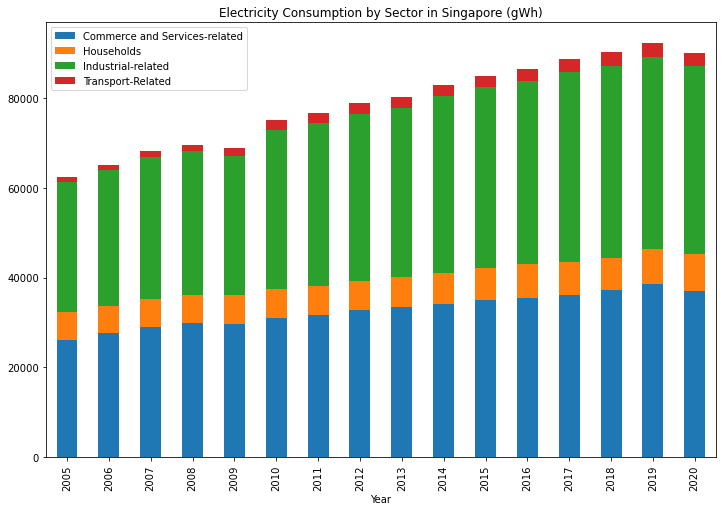

In [19]:
df['Year'] = df.index
df.plot(x = 'Year', kind = 'bar', stacked = True, title ='Electricity Consumption by Sector in Singapore (gWh)', figsize = (12,8) )

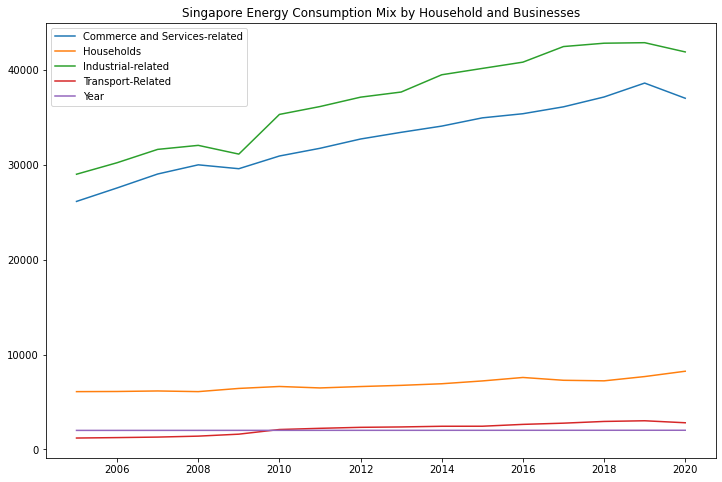

In [20]:
plot = df.plot(title = 'Singapore Energy Consumption Mix by Household and Businesses', figsize = (12,8)).get_figure()
plot.savefig('Singapore_energy_consumption_mix_by_household_and_biz.png')

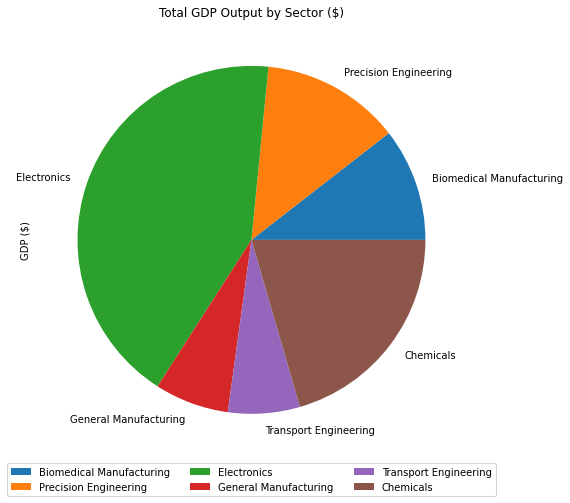

In [21]:
df = pd.read_excel('total_gdp_output_by_sector.xlsx', index_col = 0)
df.plot.pie(y = 'GDP ($)',figsize = (12,8), title = 'Total GDP Output by Sector ($)')
plt.legend(bbox_to_anchor = (0.5,-0.1),loc = 'lower center',ncol = 3)


In [22]:
df0 = pd.read_csv('sg_gdp_per_capita.csv', index_col = 0)
df0.columns = ['GDP Per Capita (US$)']
df0.index = df0.index.str[:4]
df0 = df0.iloc[:-1,:]
df0.head(2)

,GDP Per Capita (US$)
DATE,
1960,3609.589436
1961,3774.899726


In [24]:
df = pd.read_csv('sg_real_gdp.csv', index_col = 0)
df.index = df.index.str[:4]
df.columns = ['Singapore GDP (US$)']
df['Annual % Change'] = df['Singapore GDP (US$)'].pct_change()
df = df.fillna(method = 'bfill')
df.head(2)

,Singapore GDP (US$),Annual % Change
DATE,,
1960,8494.665039,0.079827
1961,9172.764648,0.079827


## Subplots to see Singapore's GDP data over time

[Text(0, 0.5, 'Annual % Change')]

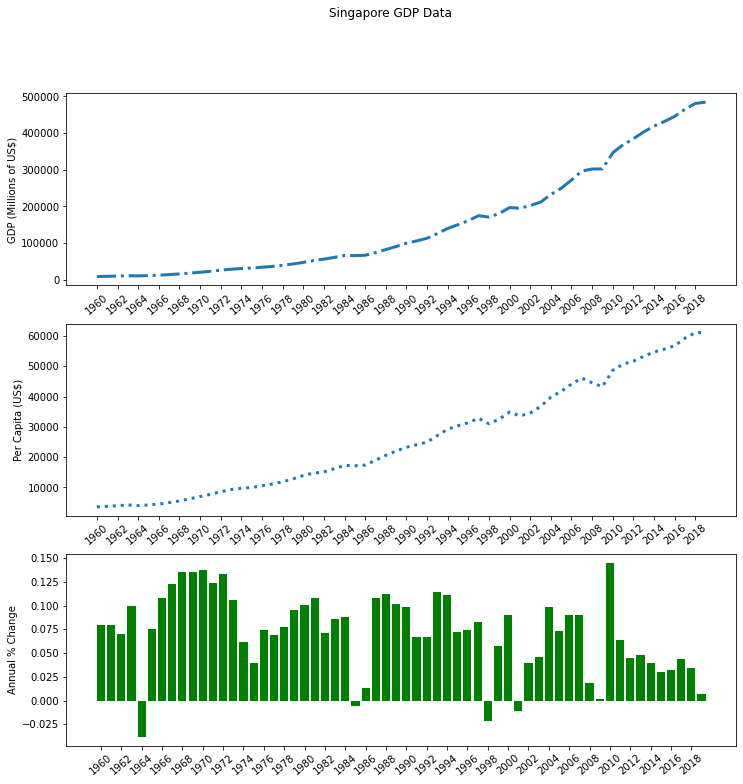

In [25]:
fig, ax = plt.subplots(3, figsize = (12,12))
fig.suptitle('Singapore GDP Data')
ax[0].plot(df.index,df['Singapore GDP (US$)'],ls = '-.',linewidth = 3)
ax[0].set_xticks(df.index[::2])
ax[0].tick_params(axis = 'x',labelrotation = 40)
ax[0].set(ylabel = 'GDP (Millions of US$)')

ax[1].plot(df0.index,df0.iloc[:,0], ls = ':', linewidth = 3)
ax[1].set_xticks(df0.index[::2])
ax[1].tick_params(axis = 'x',labelrotation = 40)
ax[1].set(ylabel = 'Per Capita (US$)')

ax[2].bar(df.index,df['Annual % Change'],ls = '-.',linewidth = 3, color = 'g')
ax[2].set_xticks(df.index[::2])
ax[2].tick_params(axis = 'x',labelrotation = 40)
ax[2].set(ylabel = 'Annual % Change')


In [26]:
total = df.sum(axis = 1)
for i in df:
    df[i] = 100* df[i]/total

## We can see that households only contribute very little to the energy consumption in Singapore.
## Next we evaluate what type of energy consumption contributes the most negatively for the environment

## Correlation Heatmap
1. Next we breakdown the energy consumption into different energy sources
2. Investigate the correlation between the change in energy mix vs global temperatures and greenhouse gases

In [27]:
## First ge tthe land average temperature

df = pd.read_csv('GlobalTemperatures.csv') #Read global temperature csv file
df = df.iloc[::12]
df = df[['dt','LandAverageTemperature']] #Get just the date and the land average temp
df.LandAverageTemperature = df.LandAverageTemperature.astype(float) #Change to floating type
year = list(map(lambda x: int(x[:4]),df.dt))
df.dt = year
df.columns = ['Year','LandAverageTemperature']
temperature = df
temperature

,Year,LandAverageTemperature
0,1750,3.034
12,1751,2.495
24,1752,0.348
36,1753,2.039
48,1754,1.574
...,...,...
3132,2011,3.282
3144,2012,3.157
3156,2013,3.685
3168,2014,3.732


In [28]:
#Global CO2 emmissions dataset

In [29]:
df = pd.read_csv('owid-absolute-change-co2.csv')
df = df[df['Entity']=='World']
df = df[df.columns[2:]]
df['Annual CO2 Emissions'] = df['Annual CO2 emissions growth (abs)'].cumsum() #Cumsum to get actual values
co2_emissions = df
co2_emissions.drop('Annual CO2 emissions growth (abs)', axis = 1, inplace = True) #Drop the change column
co2_emissions

,Year,Annual CO2 Emissions
23058,1751,0
23059,1752,3664
23060,1753,3664
23061,1754,7328
23062,1755,10992
...,...,...
23323,2016,35443108770
23324,2017,35916387159
23325,2018,36636789257
23326,2019,36693152375


In [30]:
## Next, we get the energy mix dataset

In [31]:

df = pd.read_csv('primary-sub-energy-source.csv')
tgt_ctrs = ['Singapore','North America','Europe','China','India','France','Japan']
world_energy = df[df['Entity']=='World']
world_energy_change = world_energy[world_energy.columns[2:]]
year = list(map (lambda x: x,list(np.arange(1965,2021))))
world_energy_change.Year = year
world_energy_change = world_energy_change.iloc[1:,:]
world_energy_change.columns = ['Year','Wind','Hydro','Solar','Nuclear','Biofuels','Geo Biomass','Coal','Oil','Gas']
world_energy_change.drop('Nuclear',axis = 1,inplace = True)
world_energy_change

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Year,Wind,Hydro,Solar,Biofuels,Geo Biomass,Coal,Oil,Gas
4948,1966,0.000000,2732.825103,0.000000,NaN,19.806007,16324.09385,19334.40336,6868.794525
4949,1967,0.000000,2793.729589,0.000000,NaN,19.986571,16060.80973,20719.05513,6837.700000
4950,1968,0.000000,2942.469467,0.000000,NaN,22.120045,16301.14668,22475.13906,6685.300000
4951,1969,0.000000,3115.953392,0.000000,NaN,23.257964,16798.73584,24332.44722,6738.200000
4952,1970,0.000000,3262.909933,0.000000,NaN,25.693196,17058.60813,26484.39634,6732.900000
4953,1971,0.000000,3408.513903,0.000000,NaN,27.879168,16965.95926,27977.60086,7232.000000
4954,1972,0.000000,3568.417689,0.000000,NaN,29.877101,17158.63674,30106.23500,8273.000000
4955,1973,0.000000,3619.470800,0.000000,NaN,32.084924,17667.84954,32521.65089,8443.200000
4956,1974,0.000000,3975.736067,0.000000,NaN,33.958814,17682.05122,32061.84792,8656.300000
4957,1975,0.000000,4024.693478,0.000000,NaN,34.483679,18024.53777,32555.40000,8869.400000


In [32]:
### Merge them all into one dataframe with a left join, so that the indexes match with each other

In [33]:
world_energy_change = world_energy_change.merge(co2_emissions, on='Year', how = 'left')
world_energy_change = temperature.merge(world_energy_change, on = 'Year', how = 'left')

world_energy_change.corr().loc

In [34]:
world_energy_change['Temperature'] = world_energy_change['LandAverageTemperature']


In [35]:
## Get the correlation Matrix
world_energy_change.corr().iloc[10:]

,Year,LandAverageTemperature,Wind,Hydro,Solar,Biofuels,Geo Biomass,Coal,Oil,Gas,Annual CO2 Emissions,Temperature
Annual CO2 Emissions,0.978975,0.675113,0.785806,0.983499,0.618080,0.947973,0.956511,0.983026,0.963932,0.962737,1.000000,0.675113
Temperature,0.431647,1.000000,0.413200,0.691243,0.320701,0.243157,0.609033,0.648470,0.688515,0.666814,0.675113,1.000000


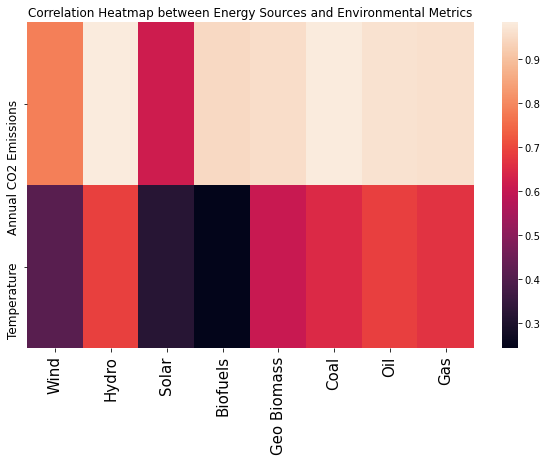

In [36]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6)) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
cmap = sns.cm.rocket
plot = sns.heatmap(world_energy_change.corr().iloc[10:,2:10],cmap = cmap)
plot.set_title('Correlation Heatmap between Energy Sources and Environmental Metrics')

plt.savefig('Corr_heatmap.png')

In [37]:
#### From the correlation table above, we can see that coal, oil and gas have a high correlation with LandAverageTemperature, while solar, hydro and biofuels has a lower correlation with LandAverageTemperature.

#### Hence to reduce global warming, we should aim to cut down on use of oil, gas and coal and convert to solar, biofuels and hydro energy alternatives

#### CO2 emissions also have a weak correlation with Wind, Solar and nuclear energy consumption

In [38]:
df = pd.read_excel('Sg_energy_mix_Public_2021_tidy.xlsx', sheet_name = 'T3.11')
df = df.groupby(['year','sector']).sum()
df

oil_consump_ktoe
year sector                                         
2009 Commerce and Services-related              78.5
     Households                                 25.3
     Industrial-related                       4177.7
     Others                                      0.0
     Overall                                  6474.8
...                                              ...
2019 Households                                 23.5
     Industrial-related                       7611.1
     Others                                      0.0
     Overall                                 10025.0
     Transport-related                        2320.1

[66 rows x 1 columns]

In [39]:
plot_df = {}
for sector in df.groupby('sector'):
    data = sector[1][:-1]
    data = data[['oil_consump_ktoe']]
    data.index = np.arange(2009,2019)
    plot_df[sector[0]] = data

In [40]:
df = pd.DataFrame(plot_df['Commerce and Services-related'])
df

,oil_consump_ktoe
2009,78.5
2010,84.2
2011,68.9
2012,68.3
2013,87.3
2014,78.9
2015,80.0
2016,77.3
2017,75.2
2018,74.4


In [41]:

for i in plot_df:
    if i in ['Industrial-related','Transport-related','Others']:
        df = pd.concat([df,plot_df[i]],axis = 1)
df.columns = ['Commerce and Services','Industrial','Others','Transport']
df

,Commerce and Services,Industrial,Others,Transport
2009,78.5,4177.7,0.0,2193.300000
2010,84.2,5465.2,0.0,2219.100000
2011,68.9,5153.4,0.0,2366.900000
2012,68.3,5562.0,0.0,2292.700000
2013,87.3,6225.3,0.0,2133.300000
2014,78.9,6665.5,0.0,2199.780789
2015,80.0,7251.6,0.0,2364.500000
2016,77.3,6554.3,0.0,2436.500000
2017,75.2,6547.3,0.0,2192.000000
2018,74.4,6520.7,0.0,2111.500000


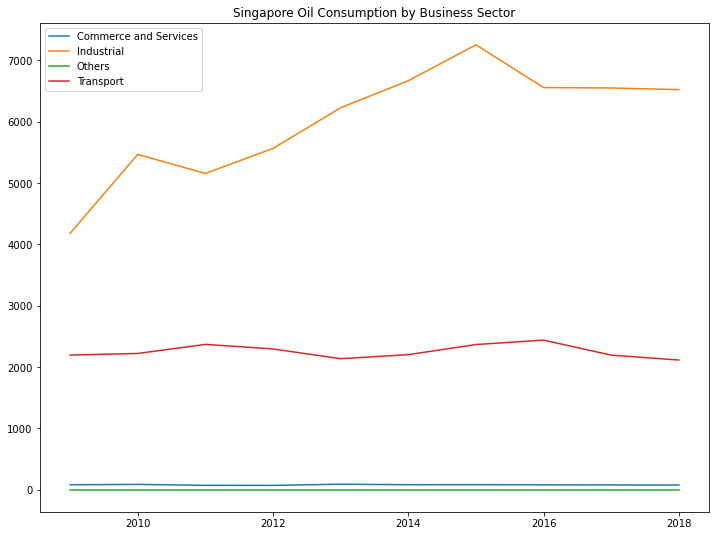

In [42]:
plot = df.plot(figsize = (12,9), title = 'Singapore Oil Consumption by Business Sector').get_figure()
plot.savefig('Singapore_oil_consumption_by_business_sector.png')

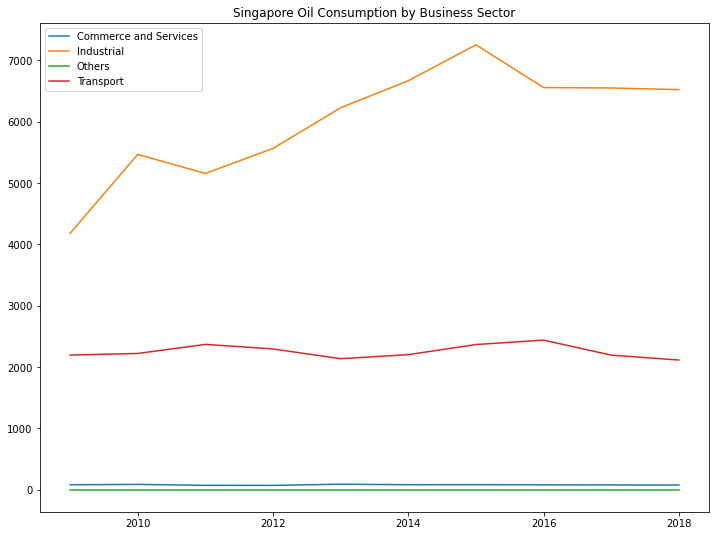

In [43]:
plot = df.plot(figsize = (12,9), title = 'Singapore Oil Consumption by Business Sector').get_figure()
plot.savefig('Singapore_oil_consumption_by_business_sector.png')

In [44]:
## Firms in the Industrial as well as transport service can aim to seek more sustainable sources of energy as they have the highest use of oil in their daily business activitesi